In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import zipfile

In [2]:
zf = zipfile.ZipFile("student.zip")
df = pd.read_csv(zf.open('student-mat.csv'),sep = ";")

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.columns.tolist()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

Logistic Regression

In [4]:
df_dumb = pd.get_dummies(df[['sex', 'higher', 'famsup']],drop_first=True)
df_dumb.head()
df_newc = pd.concat([df_dumb,df[['age']]], axis=1)

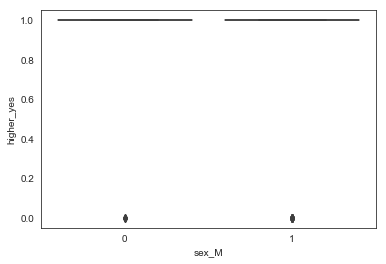

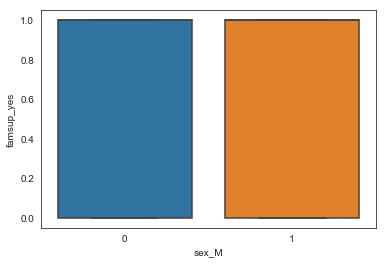

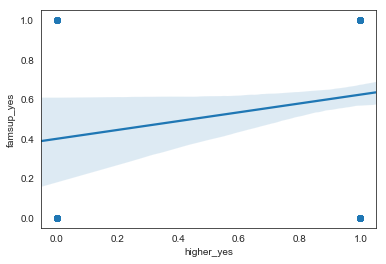

In [5]:
# Prettier plots are better.
sns.set_style("white")

# Bivariate relationships of predictors to higher education, Family Support, and Sex Male outcome.
sns.boxplot(x="sex_M", y="higher_yes", data=df_dumb)
plt.show()
sns.boxplot(x="sex_M", y="famsup_yes", data=df_dumb)
plt.show()


# Relationship between predictors.
sns.regplot(x='higher_yes', y='famsup_yes', data=df_dumb)
plt.show()

In [6]:

# Declare predictors.
X_statsmod = df_newc[['higher_yes']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
# X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(X_statsmod, df_newc[['sex_M', 'famsup_yes']])
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.172277
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             higher_yes   No. Observations:                  395
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            1
Date:                Sat, 20 Apr 2019   Pseudo R-squ.:                     inf
Time:                        11:33:46   Log-Likelihood:                -68.050
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex_M          1.5731      0.274      5.732      0.000       1.035       2.111
famsup_yes     2.9677      0.

C:\Users\postgres\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\postgres\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\postgres\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3313: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [7]:
X_statsmod.shape


(395, 1)

In [8]:
lr = LogisticRegression(C=1e9)
y = df_newc['higher_yes']
X = df_newc[['sex_M', 'famsup_yes']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by Grade Point 1 and Grade point 2')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[-1.45952331  0.72634928]]
[3.49452836]

 Accuracy by Grade Point 1 and Grade point 2
higher_yes   0    1
row_0              
1           20  375

 Percentage accuracy
0.9493670886075949


C:\Users\postgres\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Ridge Regression

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [10]:
zf = zipfile.ZipFile("student.zip")
df = pd.read_csv(zf.open('student-mat.csv'),sep = ";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
df_dumb = pd.get_dummies(df[['sex', 'higher', 'famsup']],drop_first=True)
df_dumb.head()
df_new3 = pd.concat([df_dumb,df[['G3']]], axis=1)

In [12]:
# Define the training and test sizes.
trainsize = int(df_new3.shape[0] / 2)
df_test = df_new3.iloc[trainsize:, :].copy()
df_train = df_new3.iloc[:trainsize, :].copy()

# Set up the regression model to predict defaults using all other
# variables as features.
regr1 = linear_model.Ridge()
Y_train = df_train['G3'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['G3'])]
regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))

#Store the parameter estimates.
origparams = np.append(regr1.coef_, regr1.intercept_)




R-squared simple model:
0.10115575968974244


In [13]:
# Make new features to capture potential quadratic and cubic relationships
# between the features.
df_train['sex_higher'] = df_train['sex_M'] * df_train['higher_yes']
df_train['sex_famsup'] = df_train['sex_M'] * df_train['famsup_yes']
df_train['higher_famsup'] = df_train['higher_yes'] * df_train['famsup_yes']


# Re-run the model with the new features.
regrBig = linear_model.LinearRegression()
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['G3'])]
regrBig.fit(X_train2, Y_train)
print('\nR-squared complex model:')
print(regrBig.score(X_train2, Y_train))

# Store the new parameter estimates for the same features.
newparams = np.append(
    regrBig.coef_[0,0:(len(origparams)-1)],
    regrBig.intercept_)

print('\nParameter Estimates for the same predictors for the small model '
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)


R-squared complex model:
0.11461012021216499

Parameter Estimates for the same predictors for the small model and large model:
[[1.644 -4.944]
 [5.279 0.816]
 [-0.835 -1.344]
 [5.266 10.344]]


In [14]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

print('\nParameter Estimates for the same predictors for the small model'
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)

0.03825825501850444
[2.79051242 8.48579306 0.73760069]
0.039003051094489205

Parameter Estimates for the same predictors for the small modeland large model:
[[2.791 2.668]
 [8.486 8.377]
 [0.738 1.239]]


Lasso Regression

In [55]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [56]:
zf = zipfile.ZipFile("student.zip")
df = pd.read_csv(zf.open('student-mat.csv'),sep = ";")

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [57]:
df_dumb = pd.get_dummies(df[['sex', 'higher', 'famsup']],drop_first=True)
df_dumb.head()
df_new4 = pd.concat([df_dumb,df[['G3']]], axis=1)

In [58]:
# Define the training and test sizes.
trainsize = int(df_new4.shape[0] / 2)
df_test = df_new4.iloc[trainsize:, :].copy()
df_train = df_new4.iloc[:trainsize, :].copy()

Y_train = df_train['G3'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['G3'])]



In [59]:
# Make new features to capture potential quadratic and cubic relationships
# between the features.
df_train['sex_higher'] = df_train['sex_M'] * df_train['higher_yes']
df_train['sex_famsup'] = df_train['sex_M'] * df_train['famsup_yes']
df_train['higher_famsup'] = df_train['higher_yes'] * df_train['famsup_yes']


X_train2 = df_train.loc[:, ~(df_train.columns).isin(['G3'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['G3'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['G3'])]

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['G3'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['G3'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['G3'])]

# Test the more complex model with larger coefficients.
df_train['sex_higher'] = df_train['sex_M'] * df_train['higher_yes']
df_train['sex_famsup'] = df_train['sex_M'] * df_train['famsup_yes']
df_train['higher_famsup'] = df_train['higher_yes'] * df_train['famsup_yes']

X_test2 = df_test.loc[:, ~(df_test.columns).isin(['G3'])]

In [60]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.0

Parameter estimates for the model with few features:
[ 0.          0.         -0.         10.59390863]

R² for the model with many features:
0.04004431029593769

Parameter estimates for the model with many features:
[ 0.          0.         -0.          0.9276419   0.         -0.
 10.14656863]


In [61]:
print(X_train2)
print(Y_train)

     sex_M  higher_yes  famsup_yes  sex_higher  sex_famsup  higher_famsup
0        0           1           0           0           0              0
1        0           1           1           0           0              1
2        0           1           0           0           0              0
3        0           1           1           0           0              1
4        0           1           1           0           0              1
5        1           1           1           1           1              1
6        1           1           0           1           0              0
7        0           1           1           0           0              1
8        1           1           1           1           1              1
9        1           1           1           1           1              1
10       0           1           1           0           0              1
11       0           1           1           0           0              1
12       1           1           1    

In [62]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

-0.006283119149905758


ValueError: shapes (198,3) and (6,) not aligned: 3 (dim 1) != 6 (dim 0)